# Data Cleaning

During this stage, our objective is to clean the data and prepare it for subsequent analysis and the development of Machine Learning models. This cleanup includes the following: <br>
    1. Handling Missing Data <br>
    2. Dealing with Duplicates <br>
    3. Feature Engineering <br>
    4. Outlier Treatment <br>
    5. Data Type Conversion <br>
       
**Excel File Utilized : Explored-Delhi-Prices.xlsx**

**Imports**

In [1]:
import pandas as pd
import numpy as np
import os

**Creating a DataFrame from the Imported Excel File**

In [2]:
cwd = os.getcwd()
df = pd.read_excel(cwd + "/Explored-Delhi-Prices.xlsx")
df

,Locality,Area,BHK,Bathroom,Price (in Lakhs)
0,Sector 3 Dwarka,1900,3.0,3.0,180.00
1,Sector 3 Dwarka,1900,3.0,2.0,180.00
2,Sector 3 Dwarka,1900,3.0,2.0,180.00
3,Sector 3 Dwarka,1900,3.0,3.0,181.00
4,Sector 3 Dwarka,1900,3.0,3.0,180.00
...,...,...,...,...,...
51975,NaN,600,NaN,NaN,25.00
51976,NaN,1800,NaN,NaN,400.00
51977,NaN,789,NaN,NaN,36.32
51978,NaN,1000,NaN,NaN,48.00


<hr>

### Handling Missing Data

In [3]:
df.isnull().sum()

Locality            2345
Area                   0
BHK                 8147
Bathroom            7506
Price (in Lakhs)       0
dtype: int64

**Filling missing `BHK` values with `mode` value**

In [4]:
mode_value = df['BHK'].mode().values[0]
df['BHK'] = df['BHK'].replace(['NULL', np.nan], mode_value).astype(int)

**Filling missing `Bathroom` values with `mode` value**

In [5]:
mode_value = df['Bathroom'].mode().values[0]
df['Bathroom'] = df['Bathroom'].replace(np.nan, mode_value).astype(int)

**Replace missing `Bathroom` values with `Unknown`**

In [6]:
df['Locality'] = df['Locality'].replace(np.nan, 'Unknown')

**Recheck for Null values, if any still left**

In [7]:
df.isnull().sum()

Locality            0
Area                0
BHK                 0
Bathroom            0
Price (in Lakhs)    0
dtype: int64

<hr>

### Dealing with Duplicates

In [8]:
df2 = df.drop_duplicates()

In [9]:
df2.shape

(46387, 5)

<hr>

### Feature Engineering

**Creating `Price per Sqft`**

In [10]:
df2['Price (in Lakhs)'] = df2['Price (in Lakhs)'].astype(float)
df2['Area'] = df2['Area'].astype(float)

df2['Price per Sqft'] = df2['Price (in Lakhs)'] * 100000 / df2['Area']

df2

/var/folders/59/tw9tjt25711czfy1q77vh14c0000gn/T/ipykernel_99632/1183211025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price (in Lakhs)'] = df2['Price (in Lakhs)'].astype(float)
/var/folders/59/tw9tjt25711czfy1q77vh14c0000gn/T/ipykernel_99632/1183211025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Area'] = df2['Area'].astype(float)
/var/folders/59/tw9tjt25711czfy1q77vh14c0000gn/T/ipykernel_99632/1183211025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Locality,Area,BHK,Bathroom,Price (in Lakhs),Price per Sqft
0,Sector 3 Dwarka,1900.0,3,3,180.00,9473.684211
1,Sector 3 Dwarka,1900.0,3,2,180.00,9473.684211
3,Sector 3 Dwarka,1900.0,3,3,181.00,9526.315789
5,Sector 4 Dwarka,1900.0,3,3,179.00,9421.052632
6,Sector 12 Dwarka,1900.0,3,2,180.00,9473.684211
...,...,...,...,...,...,...
51970,Unknown,700.0,3,3,32.01,4572.857143
51972,Unknown,800.0,3,3,29.65,3706.250000
51974,Unknown,800.0,3,3,29.00,3625.000000
51975,Unknown,600.0,3,3,25.00,4166.666667


**Dealing with Dimensionality Curse problem with `Locality`**

In [11]:
df2['Locality'].nunique()

709

In [12]:
location_stats = df2.groupby('Locality')['Locality'].count().sort_values(ascending = False)
location_stats

Locality
Uttam Nagar           2239
Dwarka Mor            1592
Unknown               1472
Paschim Vihar         1210
Rohini Sector 24       975
                      ... 
Mirpur Turk              1
Meet Nagar               1
Meenakshi Garden         1
Mayur Vihar Phase1       1
Mohammadpur Majri        1
Name: Locality, Length: 709, dtype: int64

In [13]:
len(location_stats[location_stats <= 20])

477

In [14]:
location_stats_less_than_20 = location_stats[location_stats <= 20]
location_stats_less_than_20

Locality
Rajpur Khurd Village    20
Mohan Baba Nagar New    20
Connaught Place         20
Madhu Vihar             20
Surajmal Vihar          20
                        ..
Mirpur Turk              1
Meet Nagar               1
Meenakshi Garden         1
Mayur Vihar Phase1       1
Mohammadpur Majri        1
Name: Locality, Length: 477, dtype: int64

In [15]:
df2['Locality'] = df2['Locality'].apply(lambda x : 'Other' if x in location_stats_less_than_20 else x)
df2['Locality'].nunique()

/var/folders/59/tw9tjt25711czfy1q77vh14c0000gn/T/ipykernel_99632/730266640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Locality'] = df2['Locality'].apply(lambda x : 'Other' if x in location_stats_less_than_20 else x)


233

<hr>

### Outlier Treatment

**Using basic domain knowledge that 1 BHK must be atleast 200 Sqft, we remove such Outliers**

In [16]:
df2[df2.Area / df2.BHK < 200]

,Locality,Area,BHK,Bathroom,Price (in Lakhs),Price per Sqft
685,Other,594.0,3,5,9.24,1555.555556
1001,Saket,450.0,3,1,6.50,1444.444444
1066,Jaitpur Extension Part Ii Khadda Colony,360.0,3,2,4.80,1333.333333
1067,Talimabad,270.0,3,2,3.75,1388.888889
1068,Kalindi Kunj Mithapur Road,360.0,3,3,5.00,1388.888889
...,...,...,...,...,...,...
51957,Unknown,315.0,3,3,17.00,5396.825397
51960,Unknown,426.0,3,3,19.49,4575.117371
51961,Unknown,450.0,3,3,15.49,3442.222222
51963,Unknown,545.0,3,3,26.00,4770.642202


In [17]:
df3 = df2[~(df2.Area / df2.BHK < 200)]
df3.shape

(40710, 6)

**Removing data points that lie beyond 1 standard deviation from the mean, effectively keeping approx. 68% of the data within 1 standard deviation**

In [18]:
df3['Price per Sqft'].describe()

count     40710.000000
mean      22479.947892
std       24280.319415
min         125.000000
25%        8823.529412
50%       14722.222222
75%       23900.175972
max      200000.000000
Name: Price per Sqft, dtype: float64

In [19]:
mean_value = df3['Price per Sqft'].mean()
std_value = df3['Price per Sqft'].std()

lower_bound = mean_value - std_value
upper_bound = mean_value + std_value

df4 = df3[(df3['Price per Sqft'] >= lower_bound) & (df3['Price per Sqft'] <= upper_bound)]

In [20]:
df4.shape

(35792, 6)

In [21]:
df4['Price per Sqft'].describe()

count    35792.000000
mean     14875.144948
std       9082.331972
min        125.000000
25%       8157.894737
50%      12403.703704
75%      20372.836218
max      46706.349206
Name: Price per Sqft, dtype: float64

**Checking if the price of 3 BHK apartment is more than 2 BHK apartment for the same location or not**

In [22]:
import matplotlib
import matplotlib.pyplot as plt

def plot_scatter_chart(df, location):
    bhk2 = df[(df.Locality == location) & (df.BHK == 2)]
    bhk3 = df[(df.Locality == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.Area, bhk2['Price (in Lakhs)'], color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.Area, bhk3['Price (in Lakhs)'], color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()

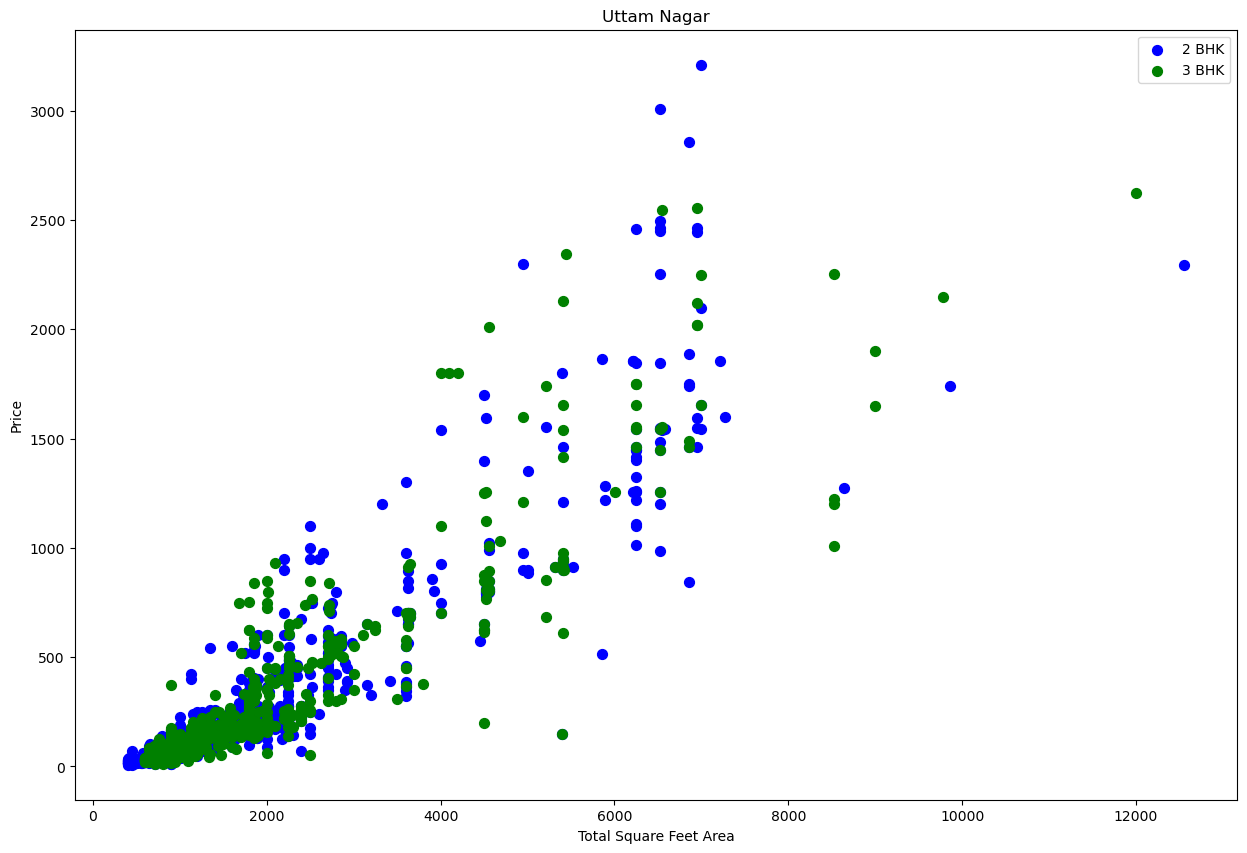

In [23]:
plot_scatter_chart(df4, 'Uttam Nagar')

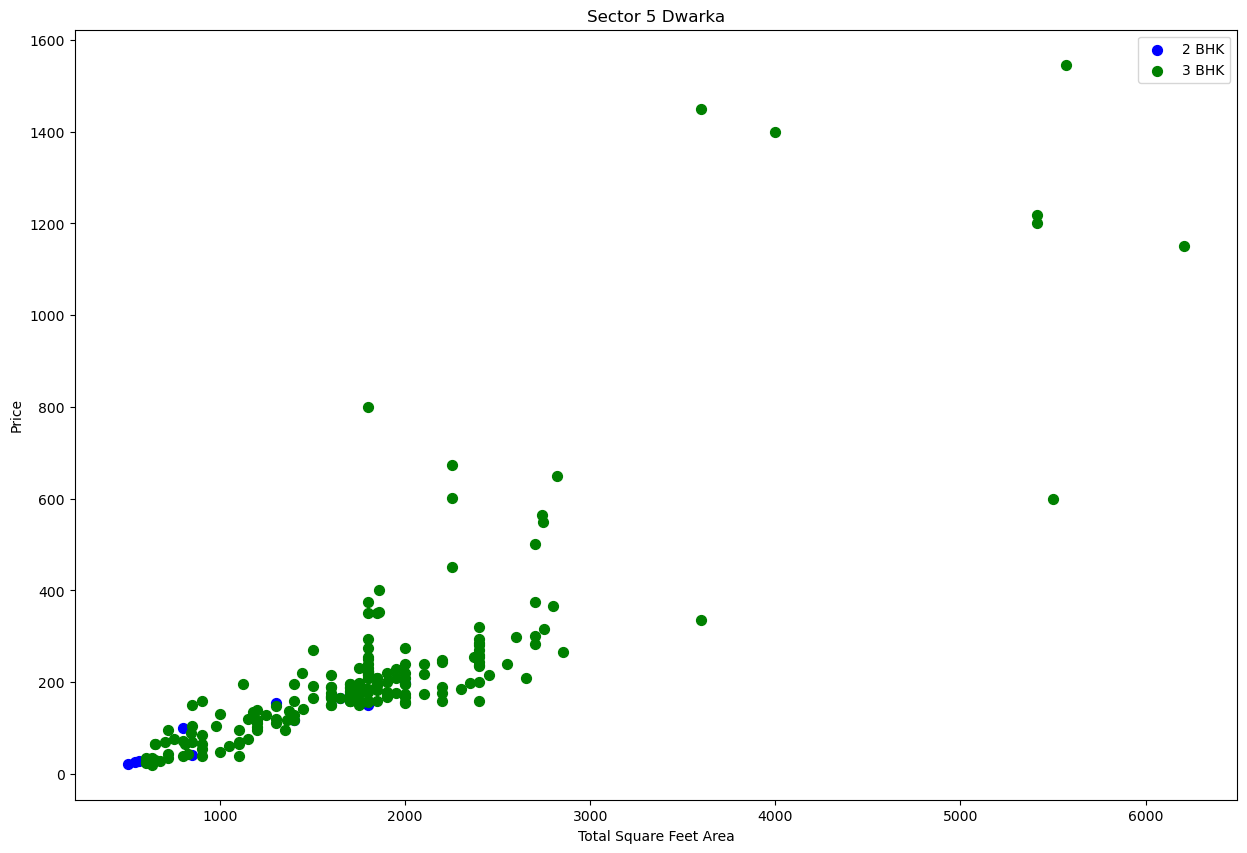

In [24]:
plot_scatter_chart(df4, 'Sector 5 Dwarka')

In [25]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Locality'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['Price per Sqft']),
                'std': np.std(bhk_df['Price per Sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['Price per Sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df5 = remove_bhk_outliers(df4)

In [26]:
df5.shape

(21651, 6)

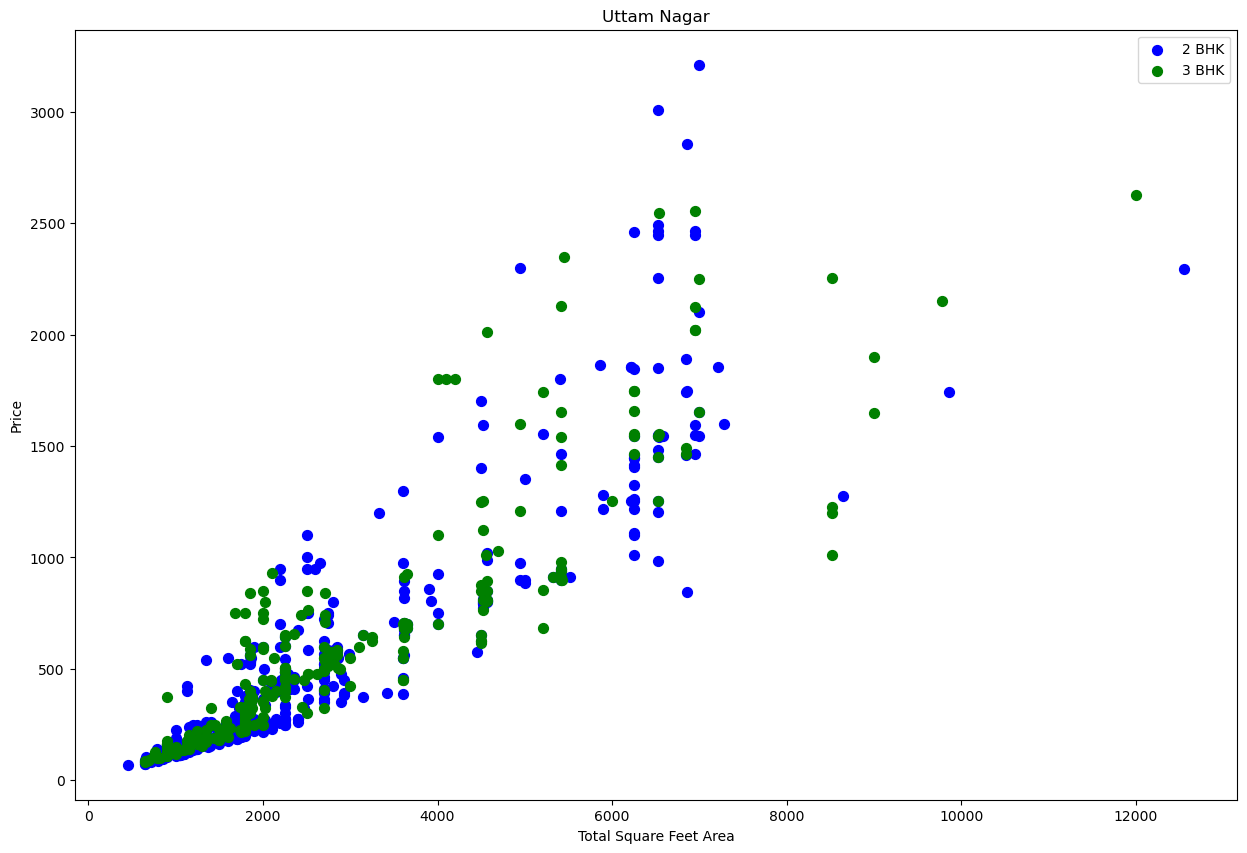

In [27]:
plot_scatter_chart(df5, 'Uttam Nagar')

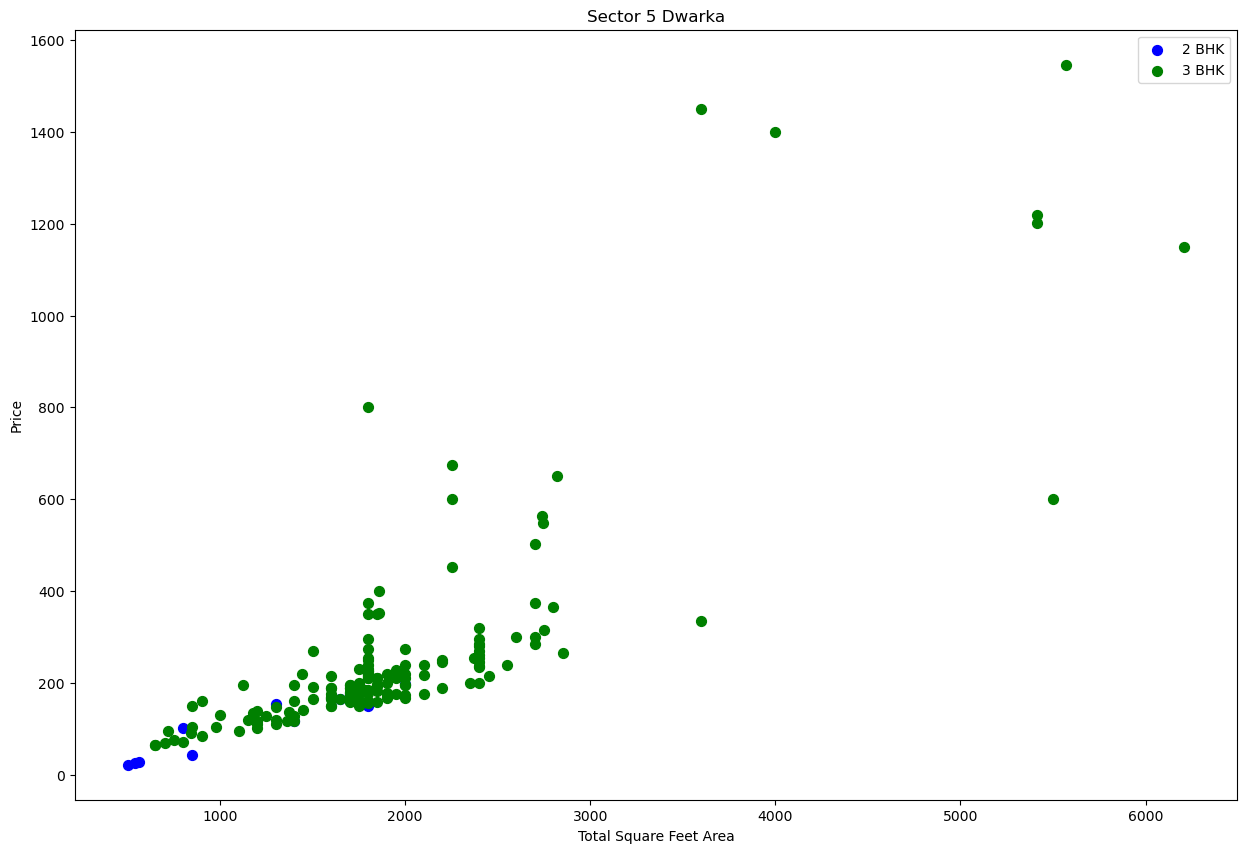

In [28]:
plot_scatter_chart(df5, 'Sector 5 Dwarka')

**Removing all the data points where Bathrooms > (BHK + 2)**

Text(0, 0.5, 'Count')

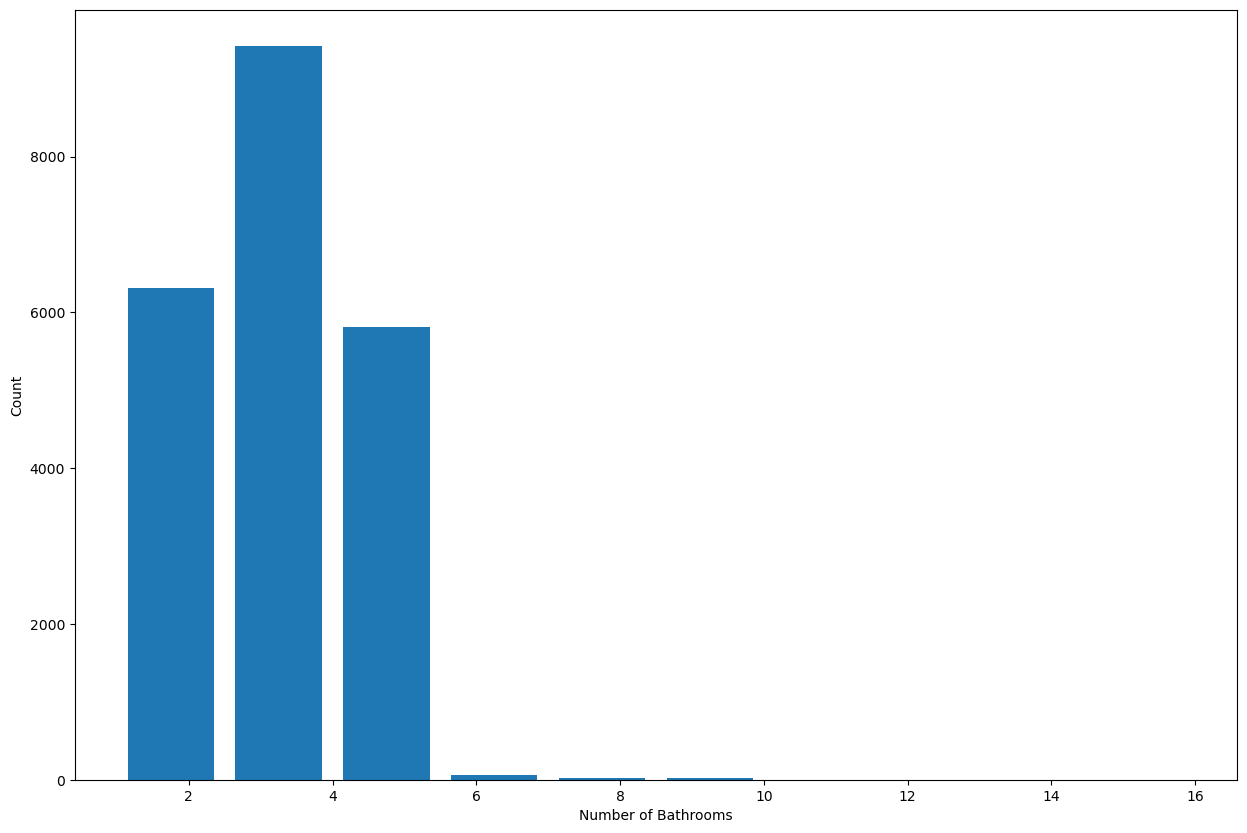

In [29]:
plt.hist(df5.Bathroom,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [30]:
df6 = df5[~(df5['Bathroom'] > df5['BHK'] + 2)]

In [31]:
df6.shape

(21083, 6)

Text(0, 0.5, 'Count')

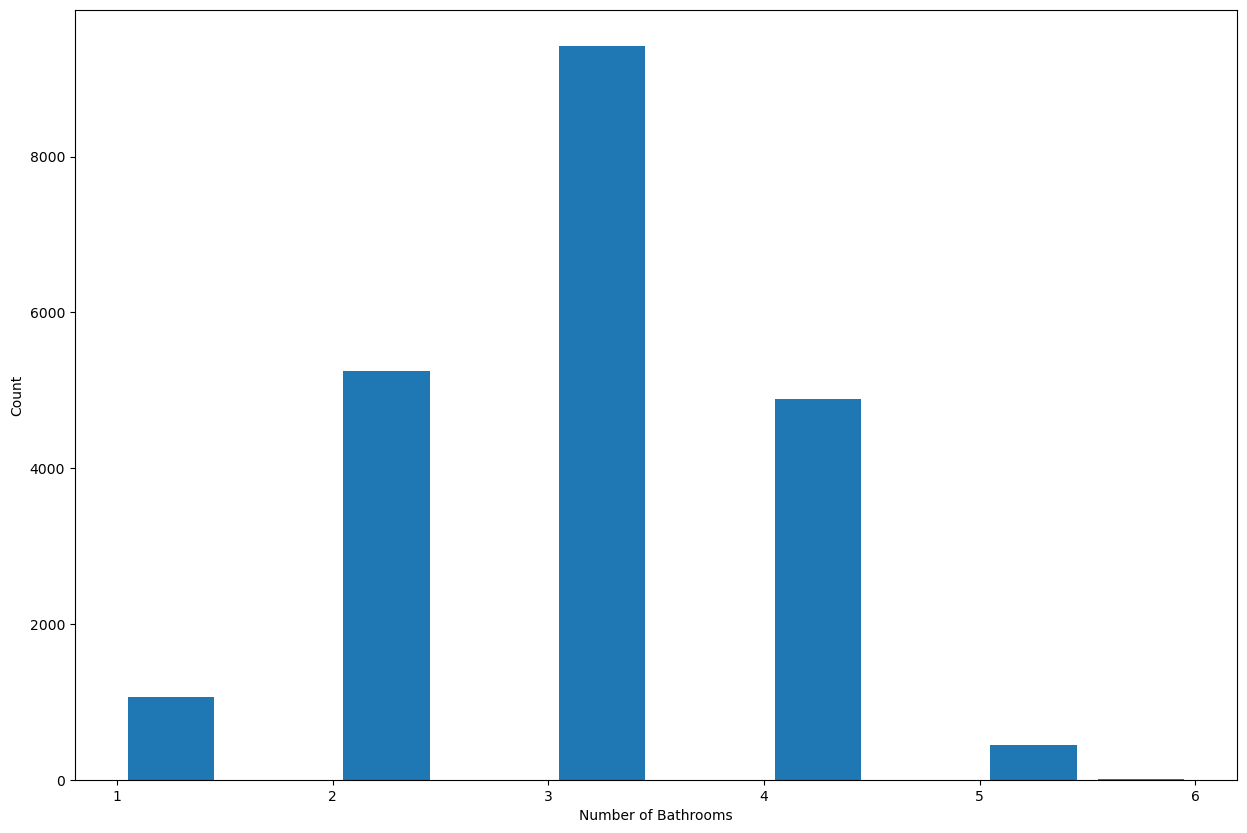

In [32]:
plt.hist(df6.Bathroom,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

**Export cleaned dataframe for Data Preprocessing**

In [33]:
df6.to_excel(cwd + "/Cleaned-Delhi-Prices.xlsx", index = False)